In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import random 
import torch
import torchvision
from torchvision import transforms, datasets
from torch.autograd import Variable
from torch.utils.data import DataLoader,random_split
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
import time

from ae_mnist import ConvAutoencoder_GELU, ConvAutoencoder_ReLU
from utils import fgsm_attack, pgd_linf, to_numpy_array, EarlyStopping
from lenet import Net

In [12]:
attack_type = 'fgsm'
activation_type = 'gelu'
dataset = 'mnist'
batch_size = 16
z_dim = 10
include_noise = True

# FGSM parameters
eps_fgsm = 0.3
#PGD parameters
eps_pgd, alpha, num_iter = 0.15, 1e-2, 40

In [13]:
transform=transforms.Compose([
            transforms.ToTensor(),
])

test_dataset = datasets.MNIST(root= './data', train = False, download =True, transform = transform)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

In [14]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f'Selected device: {device}')

Selected device: cuda


In [15]:
classifier = Net()
classifier.to(device)
classifier.load_state_dict(torch.load('./models/lenet_mnist_model.pth'))

<All keys matched successfully>

## Performance of GELU Proposed Architecture (FGSM Attack)

In [16]:
include_noise = True
attack_type = 'fgsm'
activation_type = 'gelu'

if include_noise:
    file_path = f'./models/ae_mnist_{attack_type}_{activation_type}_proposed.pth.tar'
else:
    file_path = f'./models/ae_mnist_{attack_type}_{activation_type}_vanilla.pth.tar'

convAE = ConvAutoencoder_GELU(device, z_dim, include_noise)
convAE.to(device)
convAE.load_state_dict(torch.load(file_path)['convAE_state_dict'])

<All keys matched successfully>

In [17]:
correct, total = 0, 0

for _, (imgs, labels) in enumerate(test_loader):
    batch_size = imgs.shape[0]
    imgs, labels = Variable(imgs.to(device), requires_grad=True), Variable(labels.to(device))
    
    if attack_type == 'fgsm':
        adv_imgs, _ = fgsm_attack(classifier, imgs, labels, eps_fgsm, dataset)
    else:
        adv_imgs, _ = pgd_linf(classifier, imgs, labels, eps_pgd, alpha, num_iter)

    adv_imgs = adv_imgs.to(device)

    with torch.no_grad():
        rec_imgs = convAE(adv_imgs)

    y_preds = classifier(rec_imgs).argmax(dim=1)
    correct += (y_preds==labels).sum().item()
    total += labels.size(0)

print("Epsilon: {}, Test Accuracy: {}".format(eps_fgsm, correct / total))

Epsilon: 0.3, Test Accuracy: 0.9174


## Performance of GELU Vanilla Architecture (FGSM Attack)

In [18]:
include_noise = False
attack_type = 'fgsm'
activation_type = 'gelu'

if include_noise:
    file_path = f'./models/ae_mnist_{attack_type}_{activation_type}_proposed.pth.tar'
else:
    file_path = f'./models/ae_mnist_{attack_type}_{activation_type}_vanilla.pth.tar'

convAE = ConvAutoencoder_GELU(device, z_dim, include_noise)
convAE.to(device)
convAE.load_state_dict(torch.load(file_path)['convAE_state_dict'])

<All keys matched successfully>

In [19]:
correct, total = 0, 0

for _, (imgs, labels) in enumerate(test_loader):
    batch_size = imgs.shape[0]
    imgs, labels = Variable(imgs.to(device), requires_grad=True), Variable(labels.to(device))
    
    if attack_type == 'fgsm':
        adv_imgs, _ = fgsm_attack(classifier, imgs, labels, eps_fgsm, dataset)
    else:
        adv_imgs, _ = pgd_linf(classifier, imgs, labels, eps_pgd, alpha, num_iter)

    adv_imgs = adv_imgs.to(device)

    with torch.no_grad():
        rec_imgs = convAE(adv_imgs)

    y_preds = classifier(rec_imgs).argmax(dim=1)
    correct += (y_preds==labels).sum().item()
    total += labels.size(0)

print("Epsilon: {}, Test Accuracy: {}".format(eps_fgsm, correct / total))

Epsilon: 0.3, Test Accuracy: 0.9076


## Performance of ReLU Proposed Architecture (FGSM Attack)

In [20]:
include_noise = True
attack_type = 'fgsm'
activation_type = 'relu'

if include_noise:
    file_path = f'./models/ae_mnist_{attack_type}_{activation_type}_proposed.pth.tar'
else:
    file_path = f'./models/ae_mnist_{attack_type}_{activation_type}_vanilla.pth.tar'

convAE = ConvAutoencoder_ReLU(device, z_dim, include_noise)
convAE.to(device)
convAE.load_state_dict(torch.load(file_path)['convAE_state_dict'])

<All keys matched successfully>

In [21]:
correct, total = 0, 0

for _, (imgs, labels) in enumerate(test_loader):
    batch_size = imgs.shape[0]
    imgs, labels = Variable(imgs.to(device), requires_grad=True), Variable(labels.to(device))
    
    if attack_type == 'fgsm':
        adv_imgs, _ = fgsm_attack(classifier, imgs, labels, eps_fgsm, dataset)
    else:
        adv_imgs, _ = pgd_linf(classifier, imgs, labels, eps_pgd, alpha, num_iter)

    adv_imgs = adv_imgs.to(device)

    with torch.no_grad():
        rec_imgs = convAE(adv_imgs)

    y_preds = classifier(rec_imgs).argmax(dim=1)
    correct += (y_preds==labels).sum().item()
    total += labels.size(0)

print("Epsilon: {}, Test Accuracy: {}".format(eps_fgsm, correct / total))

Epsilon: 0.3, Test Accuracy: 0.9061


## Performance of ReLU Vanilla Architecure (FGSM Attack)

In [22]:
include_noise = False
attack_type = 'fgsm'
activation_type = 'relu'

if include_noise:
    file_path = f'./models/ae_mnist_{attack_type}_{activation_type}_proposed.pth.tar'
else:
    file_path = f'./models/ae_mnist_{attack_type}_{activation_type}_vanilla.pth.tar'

convAE = ConvAutoencoder_ReLU(device, z_dim, include_noise)
convAE.to(device)
convAE.load_state_dict(torch.load(file_path)['convAE_state_dict'])

<All keys matched successfully>

In [23]:
correct, total = 0, 0

for _, (imgs, labels) in enumerate(test_loader):
    batch_size = imgs.shape[0]
    imgs, labels = Variable(imgs.to(device), requires_grad=True), Variable(labels.to(device))
    
    if attack_type == 'fgsm':
        adv_imgs, _ = fgsm_attack(classifier, imgs, labels, eps_fgsm, dataset)
    else:
        adv_imgs, _ = pgd_linf(classifier, imgs, labels, eps_pgd, alpha, num_iter)

    adv_imgs = adv_imgs.to(device)

    with torch.no_grad():
        rec_imgs = convAE(adv_imgs)

    y_preds = classifier(rec_imgs).argmax(dim=1)
    correct += (y_preds==labels).sum().item()
    total += labels.size(0)

print("Epsilon: {}, Test Accuracy: {}".format(eps_fgsm, correct / total))

Epsilon: 0.3, Test Accuracy: 0.8916


## Performance of GELU Proposed Architecure (PGD Attack)

In [24]:
include_noise = True
attack_type = 'pgd'
activation_type = 'gelu'

if include_noise:
    file_path = f'./models/ae_mnist_{attack_type}_{activation_type}_proposed.pth.tar'
else:
    file_path = f'./models/ae_mnist_{attack_type}_{activation_type}_vanilla.pth.tar'

convAE = ConvAutoencoder_GELU(device, z_dim, include_noise)
convAE.to(device)
convAE.load_state_dict(torch.load(file_path)['convAE_state_dict'])

<All keys matched successfully>

In [25]:
correct, total = 0, 0

for _, (imgs, labels) in enumerate(test_loader):
    batch_size = imgs.shape[0]
    imgs, labels = Variable(imgs.to(device), requires_grad=True), Variable(labels.to(device))
    
    if attack_type == 'fgsm':
        adv_imgs, _ = fgsm_attack(classifier, imgs, labels, eps_fgsm, dataset)
    else:
        adv_imgs, _ = pgd_linf(classifier, imgs, labels, eps_pgd, alpha, num_iter)

    adv_imgs = adv_imgs.to(device)

    with torch.no_grad():
        rec_imgs = convAE(adv_imgs)

    y_preds = classifier(rec_imgs).argmax(dim=1)
    correct += (y_preds==labels).sum().item()
    total += labels.size(0)

print("Epsilon: {}, Test Accuracy: {}".format(eps_pgd, correct / total))

Epsilon: 0.15, Test Accuracy: 0.934


## Performance of GELU Vanilla Architecure (PGD Attack)

In [26]:
include_noise = False
attack_type = 'pgd'
activation_type = 'gelu'

if include_noise:
    file_path = f'./models/ae_mnist_{attack_type}_{activation_type}_proposed.pth.tar'
else:
    file_path = f'./models/ae_mnist_{attack_type}_{activation_type}_vanilla.pth.tar'

convAE = ConvAutoencoder_GELU(device, z_dim, include_noise)
convAE.to(device)
convAE.load_state_dict(torch.load(file_path)['convAE_state_dict'])

<All keys matched successfully>

In [27]:
correct, total = 0, 0

for _, (imgs, labels) in enumerate(test_loader):
    batch_size = imgs.shape[0]
    imgs, labels = Variable(imgs.to(device), requires_grad=True), Variable(labels.to(device))
    
    if attack_type == 'fgsm':
        adv_imgs, _ = fgsm_attack(classifier, imgs, labels, eps_fgsm, dataset)
    else:
        adv_imgs, _ = pgd_linf(classifier, imgs, labels, eps_pgd, alpha, num_iter)

    adv_imgs = adv_imgs.to(device)

    with torch.no_grad():
        rec_imgs = convAE(adv_imgs)

    y_preds = classifier(rec_imgs).argmax(dim=1)
    correct += (y_preds==labels).sum().item()
    total += labels.size(0)

print("Epsilon: {}, Test Accuracy: {}".format(eps_pgd, correct / total))

Epsilon: 0.15, Test Accuracy: 0.9232


## Performance of ReLU Proposed Architecure (PGD Attack)

In [28]:
include_noise = True
attack_type = 'pgd'
activation_type = 'relu'

if include_noise:
    file_path = f'./models/ae_mnist_{attack_type}_{activation_type}_proposed.pth.tar'
else:
    file_path = f'./models/ae_mnist_{attack_type}_{activation_type}_vanilla.pth.tar'

convAE = ConvAutoencoder_ReLU(device, z_dim, include_noise)
convAE.to(device)
convAE.load_state_dict(torch.load(file_path)['convAE_state_dict'])

<All keys matched successfully>

In [29]:
correct, total = 0, 0

for _, (imgs, labels) in enumerate(test_loader):
    batch_size = imgs.shape[0]
    imgs, labels = Variable(imgs.to(device), requires_grad=True), Variable(labels.to(device))
    
    if attack_type == 'fgsm':
        adv_imgs, _ = fgsm_attack(classifier, imgs, labels, eps_fgsm, dataset)
    else:
        adv_imgs, _ = pgd_linf(classifier, imgs, labels, eps_pgd, alpha, num_iter)

    adv_imgs = adv_imgs.to(device)

    with torch.no_grad():
        rec_imgs = convAE(adv_imgs)

    y_preds = classifier(rec_imgs).argmax(dim=1)
    correct += (y_preds==labels).sum().item()
    total += labels.size(0)

print("Epsilon: {}, Test Accuracy: {}".format(eps_pgd, correct / total))

Epsilon: 0.15, Test Accuracy: 0.9142


## Performance of ReLU Vanilla Architecure (PGD Attack)

In [31]:
include_noise = False
attack_type = 'pgd'
activation_type = 'relu'

if include_noise:
    file_path = f'./models/ae_mnist_{attack_type}_{activation_type}_proposed.pth.tar'
else:
    file_path = f'./models/ae_mnist_{attack_type}_{activation_type}_vanilla.pth.tar'

convAE = ConvAutoencoder_ReLU(device, z_dim, include_noise)
convAE.to(device)
convAE.load_state_dict(torch.load(file_path)['convAE_state_dict'])

<All keys matched successfully>

In [32]:
correct, total = 0, 0

for _, (imgs, labels) in enumerate(test_loader):
    batch_size = imgs.shape[0]
    imgs, labels = Variable(imgs.to(device), requires_grad=True), Variable(labels.to(device))
    
    if attack_type == 'fgsm':
        adv_imgs, _ = fgsm_attack(classifier, imgs, labels, eps_fgsm, dataset)
    else:
        adv_imgs, _ = pgd_linf(classifier, imgs, labels, eps_pgd, alpha, num_iter)

    adv_imgs = adv_imgs.to(device)

    with torch.no_grad():
        rec_imgs = convAE(adv_imgs)

    y_preds = classifier(rec_imgs).argmax(dim=1)
    correct += (y_preds==labels).sum().item()
    total += labels.size(0)

print("Epsilon: {}, Test Accuracy: {}".format(eps_pgd, correct / total))

Epsilon: 0.15, Test Accuracy: 0.9212


## Inference latency

In [33]:
include_noise = True
attack_type = 'fgsm'
activation_type = 'gelu'

if include_noise:
    file_path = f'./models/ae_mnist_{attack_type}_{activation_type}_proposed.pth.tar'
else:
    file_path = f'./models/ae_mnist_{attack_type}_{activation_type}_vanilla.pth.tar'

convAE = ConvAutoencoder_GELU(device, z_dim, include_noise)
convAE.to(device)
convAE.load_state_dict(torch.load(file_path)['convAE_state_dict'])

<All keys matched successfully>

In [34]:
tot_time = 0

for _, (imgs, labels) in enumerate(test_loader):

    batch_size = imgs.shape[0]
    imgs, labels = Variable(imgs.to(device), requires_grad=True), Variable(labels.to(device))
    
    if attack_type == 'fgsm':
        adv_imgs, _ = fgsm_attack(classifier, imgs, labels, eps_fgsm, dataset)
    else:
        adv_imgs, _ = pgd_linf(classifier, imgs, labels, eps_pgd, alpha, num_iter)

    adv_imgs = adv_imgs.to(device)

    time_comp = time.time()

    with torch.no_grad():
        rec_imgs = convAE(adv_imgs)

    y_preds = classifier(rec_imgs).argmax(dim=1)
    tot_time += (time.time() - time_comp)

In [35]:
print(f'Time taken for defense against a single instance of attack: {(tot_time)/len(test_dataset):.4f} sec')
print(f'Total time taken: {tot_time:.4f} sec')

Time taken for defense against a single instance of attack: 0.0002 sec
Total time taken: 2.2975 sec


## Contrast in Loss Curves between ReLU and GELU

In [36]:
include_noise = True
attack_type = 'fgsm'
activation_type = 'gelu'

if include_noise:
    file_path = f'./models/ae_mnist_{attack_type}_{activation_type}_proposed.pth.tar'
else:
    file_path = f'./models/ae_mnist_{attack_type}_{activation_type}_vanilla.pth.tar'

train_losses_1 = torch.load(file_path)['train_losses']
val_losses_1 = torch.load(file_path)['val_losses']

In [37]:
include_noise = True
attack_type = 'fgsm'
activation_type = 'relu'

if include_noise:
    file_path = f'./models/ae_mnist_{attack_type}_{activation_type}_proposed.pth.tar'
else:
    file_path = f'./models/ae_mnist_{attack_type}_{activation_type}_vanilla.pth.tar'

train_losses_2 = torch.load(file_path)['train_losses']
val_losses_2 = torch.load(file_path)['val_losses']

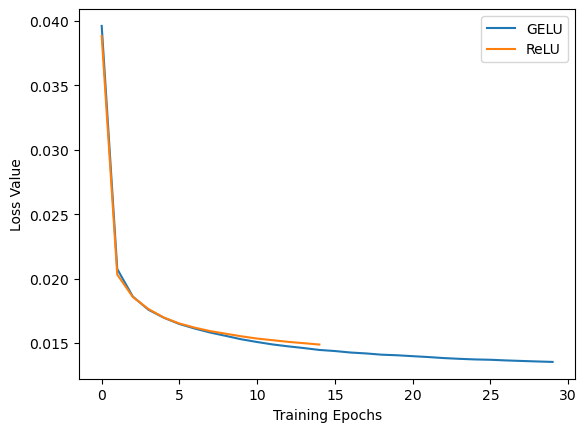

In [38]:
plt.plot(train_losses_1, label='GELU')
plt.plot(train_losses_2, label='ReLU')
plt.xlabel('Training Epochs')
plt.ylabel('Loss Value')
plt.legend()
plt.savefig(f'./plots/GELU_vs_ReLU.png', transparent=False)
plt.show()

## Contrast in Adversarial, Recreated and Original Images (FGSM attack)

In [39]:
include_noise = True
attack_type = 'fgsm'
activation_type = 'gelu'

if include_noise:
    file_path = f'./models/ae_mnist_{attack_type}_{activation_type}_proposed.pth.tar'
else:
    file_path = f'./models/ae_mnist_{attack_type}_{activation_type}_vanilla.pth.tar'

convAE = ConvAutoencoder_GELU(device, z_dim, include_noise)
convAE.to(device)
convAE.load_state_dict(torch.load(file_path)['convAE_state_dict'])

<All keys matched successfully>

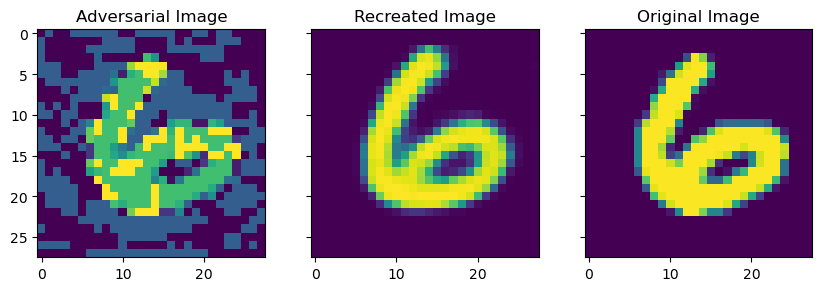

In [40]:
for i, (imgs, labels) in enumerate(test_loader):
    batch_size = imgs.shape[0]
    imgs, labels = Variable(imgs.to(device), requires_grad=True), Variable(labels.to(device))
    
    if attack_type == 'fgsm':
        adv_imgs, _ = fgsm_attack(classifier, imgs, labels, eps_fgsm, dataset)
    else:
        adv_imgs, _ = pgd_linf(classifier, imgs, labels, eps_pgd, alpha, num_iter)

    adv_imgs = adv_imgs.to(device)

    with torch.no_grad():
        rec_imgs = convAE(adv_imgs)

    imgs, adv_imgs, rec_imgs = to_numpy_array(imgs[0]), to_numpy_array(adv_imgs[0]), to_numpy_array(rec_imgs[0])

    f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(10,5))
    ax1.imshow(adv_imgs)
    ax1.set_title("Adversarial Image")
    ax2.imshow(rec_imgs)
    ax2.set_title("Recreated Image")
    ax3.imshow(imgs)
    ax3.set_title("Original Image")
    # f.plot()

    f.savefig('./plots/recreated_fgsm.png', transparent=False)
    break

## Contrast in Adversarial, Recreated and Original Images (PGD attack)

In [41]:
include_noise = True
attack_type = 'pgd'
activation_type = 'gelu'

if include_noise:
    file_path = f'./models/ae_mnist_{attack_type}_{activation_type}_proposed.pth.tar'
else:
    file_path = f'./models/ae_mnist_{attack_type}_{activation_type}_vanilla.pth.tar'

convAE = ConvAutoencoder_GELU(device, z_dim, include_noise)
convAE.to(device)
convAE.load_state_dict(torch.load(file_path)['convAE_state_dict'])

<All keys matched successfully>

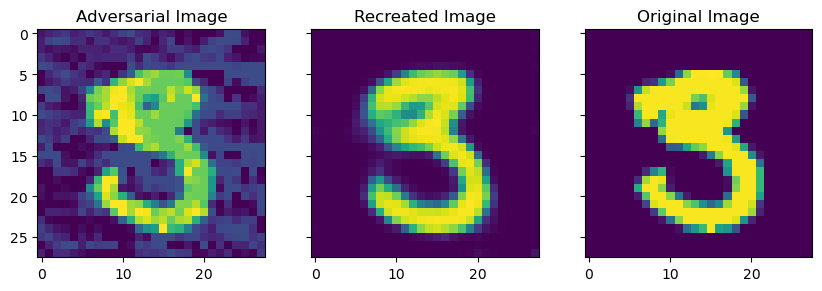

In [42]:
for i, (imgs, labels) in enumerate(test_loader):
    batch_size = imgs.shape[0]
    imgs, labels = Variable(imgs.to(device), requires_grad=True), Variable(labels.to(device))
    
    if attack_type == 'fgsm':
        adv_imgs, _ = fgsm_attack(classifier, imgs, labels, eps_fgsm, dataset)
    else:
        adv_imgs, _ = pgd_linf(classifier, imgs, labels, eps_pgd, alpha, num_iter)

    adv_imgs = adv_imgs.to(device)

    with torch.no_grad():
        rec_imgs = convAE(adv_imgs)

    imgs, adv_imgs, rec_imgs = to_numpy_array(imgs[0]), to_numpy_array(adv_imgs[0]), to_numpy_array(rec_imgs[0])

    f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(10,5))
    ax1.imshow(adv_imgs)
    ax1.set_title("Adversarial Image")
    ax2.imshow(rec_imgs)
    ax2.set_title("Recreated Image")
    ax3.imshow(imgs)
    ax3.set_title("Original Image")
    f.savefig('./plots/recreated_pgd.png', transparent=False)

    break

In [56]:
dataset = datasets.MNIST(root= './data', train = False, download =True, transform = transform)
_, t_dataset = torch.utils.data.random_split(dataset, [9500, 500])
loader = DataLoader(t_dataset, batch_size=batch_size, shuffle=True)
print(len(t_dataset))

500


In [57]:
include_noise = True
attack_type = 'pgd'
activation_type = 'gelu'
dataset = 'mnist'

if include_noise:
    file_path = f'./models/ae_mnist_{attack_type}_{activation_type}_proposed.pth.tar'
else:
    file_path = f'./models/ae_mnist_{attack_type}_{activation_type}_vanilla.pth.tar'

print(file_path)

convAE_1 = ConvAutoencoder_GELU(device, z_dim, include_noise)
convAE_1.to(device)
convAE_1.load_state_dict(torch.load(file_path)['convAE_state_dict'])

./models/ae_mnist_pgd_gelu_proposed.pth.tar


<All keys matched successfully>

In [58]:
correct, total = 0, 0

for _, (imgs, labels) in enumerate(loader):
    batch_size = imgs.shape[0]
    imgs, labels = Variable(imgs.to(device), requires_grad=True), Variable(labels.to(device))
    
    if attack_type == 'fgsm':
        adv_imgs, _ = fgsm_attack(classifier, imgs, labels, eps_fgsm, dataset)
    else:
        adv_imgs, _ = pgd_linf(classifier, imgs, labels, eps_pgd, alpha, num_iter)

    adv_imgs = adv_imgs.to(device)

    with torch.no_grad():
        rec_imgs = convAE_1(adv_imgs)

    y_preds = classifier(rec_imgs).argmax(dim=1)
    correct += (y_preds==labels).sum().item()
    total += labels.size(0)

print("Epsilon: {}, Test Accuracy: {}".format(eps_fgsm, correct / total))

Epsilon: 0.3, Test Accuracy: 0.924
